In [41]:
import matplotlib.pyplot as plt
import pandas
import numpy as np

#extracts by any type + gender 
def extractByType(genderExcel, typeList):
    final = []
    temp = []
    for i, typeList_element in enumerate(typeList):
        for j, genderExcel_element in enumerate(genderExcel):
            temp.append(float(genderExcel_element.loc[typeList_element]))
        final.append(temp)
        temp = []
    return(final)

#using read_excel function to retrieve data from excel file
mfah94 = pandas.read_excel("/home/heeseung5/Documents/CSc59969S17HW1/USFoodCommodity.xls", "94-98 FAH", None, 74, 140, 0, parse_cols = "A,H:H")
wfah94 = pandas.read_excel("/home/heeseung5/Documents/CSc59969S17HW1/USFoodCommodity.xls", "94-98 FAH", None, 74, 140, 0, parse_cols = "A,K:K")
mfah03 = pandas.read_excel("/home/heeseung5/Documents/CSc59969S17HW1/USFoodCommodity.xls", "03-04 FAH", None, 74, 140, 0, parse_cols = "A,H:H")
wfah03 = pandas.read_excel("/home/heeseung5/Documents/CSc59969S17HW1/USFoodCommodity.xls", "03-04 FAH", None, 74, 140, 0, parse_cols = "A,K:K")
mfah05 = pandas.read_excel("/home/heeseung5/Documents/CSc59969S17HW1/USFoodCommodity.xls", "05-06 FAH", None, 74, 140, 0, parse_cols = "A,H:H")
wfah05 = pandas.read_excel("/home/heeseung5/Documents/CSc59969S17HW1/USFoodCommodity.xls", "05-06 FAH", None, 74, 140, 0, parse_cols = "A,K:K")
mfah07 = pandas.read_excel("/home/heeseung5/Documents/CSc59969S17HW1/USFoodCommodity.xls", "07-08 FAH", None, 74, 140, 0, parse_cols = "A,H:H")
wfah07 = pandas.read_excel("/home/heeseung5/Documents/CSc59969S17HW1/USFoodCommodity.xls", "07-08 FAH", None, 74, 140, 0, parse_cols = "A,K:K")

#putting mens' on the menList
menList = [mfah94, mfah03, mfah05, mfah07]

#putting women's on the womenList
womenList = [wfah94, wfah03, wfah05, wfah07]

#the years provided from the excel sheet
yrs = ['94-98' , '03-04' , '05-06' , '07-08']

#type of fruits
orangestotal = '   Oranges, Total'
othercitrusfruit = '   Other citrus fruit'
stonefruit = '   Stone fruit'
tropicalfruit = '   Tropical fruit'
applesasfruit = '     Apples as fruit'
bananas = '   Bananas'
berries = '   Berries'
grapes = '   Grapes'
melons = '   Melons'
fruitList = [applesasfruit, bananas, berries, grapes, melons, orangestotal, othercitrusfruit, stonefruit, tropicalfruit]
fruitNameList = []
for i in fruitList:
    fruitNameList.append(str(i))
    
#type of dairy
fluidmilktotal = '   Fluid milk, Total'
butter = '   Butter'
cheese = '   Cheese'
yogurt = '   Yogurt'
dairyother = '   Dairy, Other'
dairyList = [fluidmilktotal, butter, cheese, yogurt, dairyother]
dairyNameList = []
for i in dairyList:
    dairyNameList.append(str(i))

fruitNdairyList = fruitNameList + dairyNameList
    
menFinalFruit = extractByType(menList, fruitList)
womenFinalFruit = extractByType(womenList, fruitList)
menFinalDairy = extractByType(menList, dairyList)
womenFinalDairy = extractByType(womenList, dairyList)

In [7]:
print(menFinalFruit)

[[89.18, 90.86, 89.7, 93.35], [95.42, 94.85, 95.59, 93.96], [84.21, 88.57, 91.83, 90.7], [88.79, 88.55, 93.65, 92.16], [80.74, 79.72, 80.85, 84.97], [85.66, 84.46, 86.0, 84.16], [79.82, 73.74, 72.95, 61.9], [88.95, 94.02, 93.05, 95.89], [74.61, 74.58, 76.94, 84.68]]


In [111]:
def percentIncrease(genderList):
    percentIncreaseList = []
    for idx, element in enumerate(genderList):
        percentIncreaseList.append(element[0] - element[len(element) - 1])
    return percentIncreaseList
    
def graphPercentIncrease(genderList, whichgender, howmany, listType, whatcolor):
    N = howmany
    ind = np.arange(N)  # the x locations for the groups
    width = 0.5       # the width of the bars
    fig, ax = plt.subplots()
    
    final = []
    temp = []
    for idx, element in enumerate(genderList):
        temp.append(element)
        temp.append(listType[idx])
        final.append(temp)
        temp = []
    
    packed_final = sorted(final, key=lambda x: x[0], reverse=False)
    unpacked_type = []
    unpacked_gender = []
    
    for idx, element in enumerate(packed_final):
        unpacked_type.append(element[1])
        unpacked_gender.append(element[0])
    
    fig.subplots_adjust(left = 4, right = 5)
    rects1 = ax.bar(ind, unpacked_gender, width, color= whatcolor)
    
    
#     rects2 = ax.bar(ind + width, women, width, color='y')
    
    
    # add some text for labels, title and axes ticks
    ax.set_ylabel('Percentage (%)')
    ax.set_xlabel('Type')

    ax.set_title(whichgender  + ' Percentage Change from 1994-1998 to 2007-2008 for Each Product')
    ax.set_xticks(ind + width / 2)
    ax.set_xticklabels(unpacked_type)


#     ax.legend((rects1[0], rects2[0]), ('Men', 'Women'))


#     def autolabel(rects):
#         """
#         Attach a text label above each bar displaying its height
#         """
#         for rect in rects:
#             height = rect.get_height()
#             ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
#                     '%d' % int(height),
#                     ha='center', va='bottom')

#     autolabel(rects1)
#     autolabel(rects2)

    plt.xticks(rotation=45)

    plt.show()
    plt.close()

In [42]:
#final
menTotal = percentIncrease(menFinalFruit) + percentIncrease(menFinalDairy)
womenTotal = percentIncrease(womenFinalFruit) + percentIncrease(womenFinalDairy)

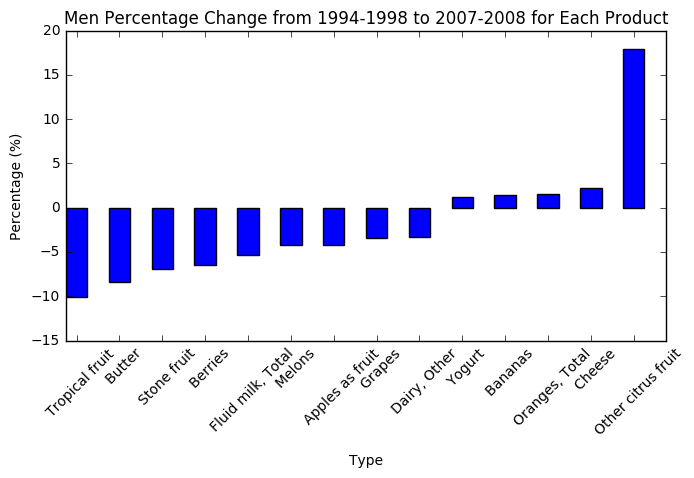

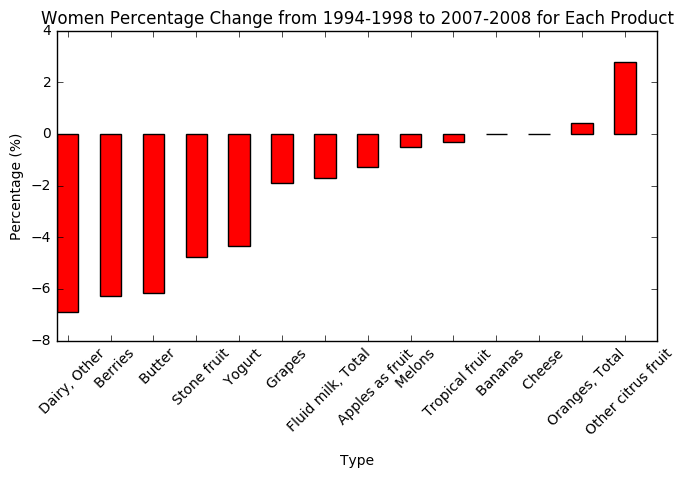

In [113]:
nFruitsNdairy = len(fruitNameList) + len(dairyNameList)
graphPercentIncrease(menTotal, 'Men', nFruitsNdairy, fruitNdairyList, 'b')
graphPercentIncrease(womenTotal, 'Women', nFruitsNdairy, fruitNdairyList, 'r')